In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd
from scipy.optimize import minimize
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
X_train = train.drop(columns = 'y').copy()
X_test = test.drop(columns = 'y').copy()
y_train = train['y'].copy()
y_test = test['y'].copy()

In [5]:
X_train_array = np.ones((len(X_train), len(X_train.columns) + 1))
X_test_array = np.ones((len(X_test), len(X_test.columns) + 1))

In [6]:
X_train_array[:, 1:] = X_train
X_test_array[:, 1:] = X_test

In [7]:
X_train_array.shape

(250, 51)

In [8]:
X_test_array.shape

(50, 51)

In [9]:
m = len(X_train.columns) #number of variable X
n = len(X_train) #number of rows

In [10]:
X_train_df = pd.DataFrame(X_train_array)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.0,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,1.0,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,1.0,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,1.0,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,1.0,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0,0.210132,-0.193059,2.033908,-0.832887,0.049040,-0.197864,-1.885529,-2.526842,-0.826903,...,0.555085,-2.099135,-0.411719,1.053645,-0.172623,-1.207709,0.748914,-1.343144,-0.696000,0.525172
246,1.0,-0.039047,-0.021366,1.040784,-3.435317,-0.419417,0.293139,-0.165674,-0.357788,-0.943576,...,-0.564113,-1.721975,-0.556074,0.028959,0.594509,-1.010988,-0.205257,-0.148502,-0.656065,0.140523
247,1.0,0.091237,0.473698,0.051832,0.721924,0.337938,1.322324,-0.605442,0.428120,0.003276,...,0.348330,0.099530,0.019925,1.121458,1.901447,-0.431072,-0.124469,-0.084185,-0.200143,0.840786
248,1.0,-1.407003,0.510886,-2.077584,-0.438144,2.225628,0.165129,-1.335051,1.348180,-0.031812,...,-1.076265,1.303594,-1.458794,1.172178,0.451014,0.572106,-3.660368,-0.052251,0.543762,0.274006


# Part 1

In [11]:
i = m * 2 + 1 
j = m * 2 + 1

A = np.zeros((i,j))
b = [''] * i
sense = [''] * i

In [12]:
c = 0
d = 1
f = 1
k = 10

while c < 2 * m + 1:
    if c < m:
        A[c][d] = 1
        A[c][m + d] = -1000
        b[c] = 0
        sense[c] = '<'
        c += 1
        d += 1
        
    elif c != 2 * m:
        A[c][f] = 1
        A[c][m + f] = 1000
        b[c] = 0
        sense[c] = '>'
        c += 1
        f += 1
        
    else:
        A[c, m+1: ] = 1
        sense[c] = '='
        b[c] = k
        c += 1

In [13]:
A.shape

(101, 101)

In [14]:
b = np.array(b)

In [15]:
len(b)

101

In [16]:
len(sense)

101

In [17]:
ub=[1000] * (m + 1) + [1] * m
lb=[-1000] * (m + 1) + [0] * m

sigma = np.zeros((i, j))
sigma[:m + 1,:m + 1] = X_train_array.T @ X_train_array

obj=np.zeros((2 * m + 1))
obj[:m + 1]=-2 * (y_train.T @ X_train_array)

var = ['C'] * (m + 1) + ['B'] * m

In [18]:
QPMod = gp.Model()
QPMod_x = QPMod.addMVar(j, ub = ub, lb = lb, vtype = var)
QPMod_con = QPMod.addMConstrs(A, QPMod_x, sense, b)

QPMod.setMObjective(sigma, obj, 0, sense = gp.GRB.MINIMIZE)
QPMod.Params.OutputFlag = 0 
QPMod.optimize()

Academic license - for non-commercial use only - expires 2022-08-25
Using license file C:\Users\lunar\gurobi.lic


In [19]:
QPMod_x.x

array([ 0.97252408,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -2.30820726,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.51832612, -0.20416201,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.55914318,  0.86697336,
        0.        , -1.31191942,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.4081653 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.78147489,  0.        ,  0.88738292, -0.28229213,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  1.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        1.        ,  1.        ,  0.        , -0.        , -0.  

In [20]:
QPMod.objVal

-4724.529618256631

# Part 2

In [72]:
def Linear_Regression(X, y, n, t): #n is the variable, t is time limit.
    
    m = X.shape[1] - 1
    i = 2 * m + 1
    j = 2 * m + 1
    
    A = np.zeros((i, j))
    
    obj = np.zeros((2 * m + 1))
    obj[:m + 1] = (y.T @ X) * (-2)
    
    sigma = np.zeros((2 * m + 1,2 * m + 1))
    sigma[:m + 1,:m + 1] = X.T @ X
    
    b = [''] * i
    sense = [''] * i
    
    ###################################################
    
    c = 0
    d = 1
    f = 1
    k = 10

    while c < 2 * m + 1:
        if c < m:
            A[c][d] = 1
            A[c][m + d] = -1000
            b[c] = 0
            sense[c] = '<'
            c += 1
            d += 1

        elif c != 2 * m:
            A[c][f] = 1
            A[c][m + f] = 1000
            b[c] = 0
            sense[c] = '>'
            c += 1
            f += 1

        else:
            A[c, m+1: ] = 1
            sense[c] = '='
            b[c] = n
            c += 1
            
    ###################################################
    
    ub = [1000] * (m + 1) + [1] * m
    lb = [-1000] * (m + 1) + [0] * m
    var = ['C'] * (m + 1) + ['B'] * m
    
    QPMod = gp.Model()
    QPMod_x = QPMod.addMVar(j, ub = ub, lb = lb, vtype = var)
    QPMod_con = QPMod.addMConstrs(A, QPMod_x, sense, b)

    QPMod.setMObjective(sigma, obj, 0, sense = gp.GRB.MINIMIZE)
    QPMod.Params.OutputFlag = 0 
    
    QPMod.Params.TimeLimit = t
    QPMod.optimize()
    
    return QPMod_x.x[:m+1], QPMod.objVal + y @ y.T

def get_prediction(X, weight):
    prediction = X @ weight
    return prediction

In [90]:
def CV(X, y, n, t, KFold):
    
    error_lst = [10000]
    weights = []
    c = 1
    error = 0 #Set error be 0 at the begining
    
    index = np.linspace(0, len(X) - 1, len(X))
    np.random.shuffle(index)
    index = np.split(index, KFold)
    
    #set up validation set
    for i in range (KFold):
        X_test = X[index[i].astype(int)]
        y_test = y[index[i].astype(int)]
        train = []
        
        for j in range (len(X)):
            if j not in index[i].astype(int):
                train.append(j)
                
        #training set 
        X_train = X[train]
        y_train = y[train]
        
        weight, err = Linear_Regression(X_train, y_train, n, t)
        
        if err < error_lst[c - 1]:
            weights.append(weight)
            error_lst.append(err)
            c += 1
        
        err2 = np.sum(weight.T @ X_test.T @ X_test @ weight - 2*y_test.T @ X_test @ weight + y_test @ y_test.T)
        error += err2        
    error = (error/KFold)
    
    return weights[-1], error

In [91]:
Linear_Regression(X_train_array, y_train, 10, 10)

(array([ 0.97252408,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -2.30820726,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.51832612, -0.20416201,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.55914318,  0.86697336,
         0.        , -1.31191942,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.4081653 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.78147489,  0.        ,  0.88738292, -0.28229213,  0.        ,
         0.        ]),
 597.996316572865)

In [92]:
CV(X_train_array, y_train, 10, 10, 10)

(array([ 0.97992385,  0.        ,  0.00819078,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -2.21781786,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.57717087, -0.1539675 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.23317412, -1.53497674,  0.8724471 ,
         0.        , -1.42222227,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.33709514,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.68789036,  0.        ,  0.84282384,  0.        ,  0.        ,
         0.        ]),
 74.44581500536715)

In [128]:
total_error = []
total_weights = []
df_view = pd.DataFrame()
n = 5

while n <= 50:
    weight, error = CV(X_train_array, y_train, n, 10, 10)
    total_error.append(error)
    total_weights.append(weight)
    print (n)
    n += 5

df_view['Weights'] = total_weights
df_view['Error'] = total_error
df_view.index = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50']

5
10
15
20
25
30
35
40
45
50


In [147]:
df_view

,Weights,Error
5,"[1.0615075390690258, 0.0, 0.0, 0.0, 0.0, 0.0, ...",91.594282
10,"[1.0004091798610506, 0.0, 0.0, 0.0, 0.0, 0.0, ...",71.084907
15,"[0.9419896374822414, 0.0, 0.0, 0.2298605047167...",80.498967
20,"[0.9759019969047347, -0.00707990963140614, 0.0...",80.484546
25,"[0.9904335626277101, -0.1613164013601, 0.0, 0....",83.774073
30,"[0.920048724056546, 0.0, -0.002117977080318576...",80.492540
35,"[0.8804653139224945, 0.0, 0.0, 0.1679520994243...",87.468492
40,"[0.8791948509658489, 0.0, -0.16632348252300455...",87.206856
45,"[1.0468960675829646, 0.0, 0.22258740850450567,...",83.076671
50,"[0.9078004113380302, 0.06758193684572689, 0.12...",85.690319


<AxesSubplot:ylabel='Error'>

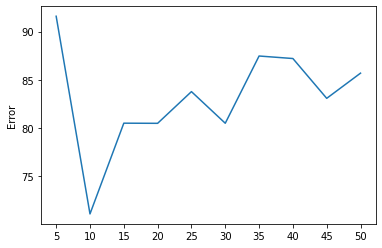

In [150]:
sns.lineplot(data = df_view, x = df_view.index, y = 'Error') #k = 10 gives the best result.

In [143]:
prediction_training = get_prediction(X_train_array, df_view['Weights'][1])
prediction_testing = get_prediction(X_test_array, df_view['Weights'][1])

# Part 3

In [98]:
alpha = 10**np.linspace(6,-6,100)
param = [{'alpha': alpha}]

clf = GridSearchCV(Lasso(), param, cv=10, scoring = 'neg_mean_squared_error', refit=True)
clf.fit(X_train_array, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e+06, 7.56463328e+05, 5.72236766e+05, 4.32876128e+05,
       3.27454916e+05, 2.47707636e+05, 1.87381742e+05, 1.41747416e+05,
       1.07226722e+05, 8.11130831e+04, 6.13590727e+04, 4.64158883e+04,
       3.51119173e+04, 2.65608778e+04, 2.00923300e+04, 1.51991108e+04,
       1.14975700e+04, 8.69749003e+03, 6.57933225e+03,...
       6.13590727e-04, 4.64158883e-04, 3.51119173e-04, 2.65608778e-04,
       2.00923300e-04, 1.51991108e-04, 1.14975700e-04, 8.69749003e-05,
       6.57933225e-05, 4.97702356e-05, 3.76493581e-05, 2.84803587e-05,
       2.15443469e-05, 1.62975083e-05, 1.23284674e-05, 9.32603347e-06,
       7.05480231e-06, 5.33669923e-06, 4.03701726e-06, 3.05385551e-06,
       2.31012970e-06, 1.74752840e-06, 1.32194115e-06, 1.00000000e-06])}],
             scoring='neg_mean_squared_error')

In [130]:
#fit model
best_alpha = clf.best_params_
best_alpha = list(best_alpha.values())[0]

lasso_model = LassoCV(alphas = [best_alpha], cv=10)
lasso_model.fit(X_train, list(y_train))
lasso_weight = lasso_model.coef_ 

In [131]:
#make prediction
train_predict = lasso_model.predict(X_train)
test_predict = lasso_model.predict(X_test)

In [132]:
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

In [144]:
#LR model
train_mse_2 = mean_squared_error(y_train, prediction_training)
test_mse_2 = mean_squared_error(y_test, prediction_testing)

In [160]:
df_report = pd.DataFrame()

df_report['Train Error'] = [train_mse, train_mse_2]
df_report['Test Error'] = [test_mse, test_mse_2]
df_report.index = ['Lasso', 'LR']

In [161]:
df_report

,Train Error,Test Error
Lasso,2.356777,2.346139
LR,2.406604,2.280283
